<h1>Function Transformers</h1>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = sns.load_dataset("titanic")
df.head()

<h1>Log Tranformer</h1>

<h1>Before Log Transformation</h1>

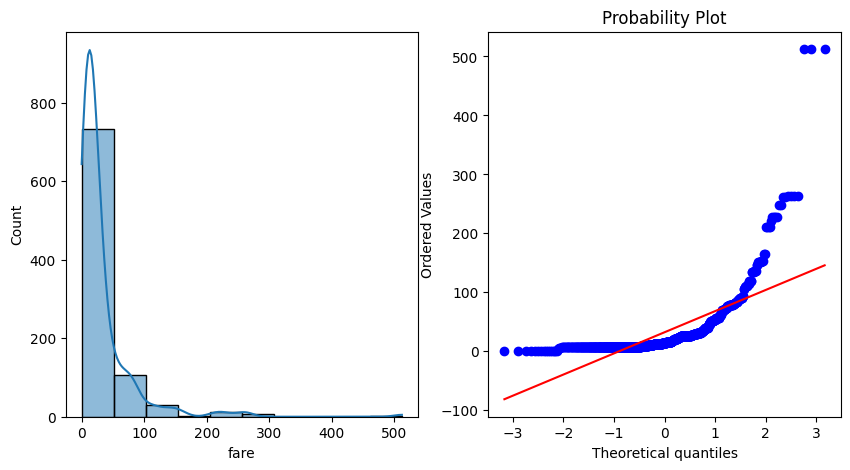

In [3]:
fig, axis = plt.subplots(nrows=1,ncols=2, figsize=(10, 5))

sns.histplot(df["fare"],kde=True,bins=10, label='data1', ax=axis[0])
stats.probplot(x=df["fare"],dist="norm",plot=plt)

plt.show()

In [9]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

In [12]:
logtranformer = FunctionTransformer(np.log1p)
df["fare"] = logtranformer.fit_transform(df["fare"])

In [13]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
544,0,1,male,50.0,1,0,1.734738,C,First,man,True,C,Cherbourg,no,False
70,0,2,male,32.0,0,0,1.209371,S,Second,man,True,NaN,Southampton,no,True
751,1,3,male,6.0,0,1,1.259519,S,Third,child,False,E,Southampton,yes,False
703,0,3,male,25.0,0,0,1.114033,Q,Third,man,True,NaN,Queenstown,no,True
877,0,3,male,19.0,0,0,1.120482,S,Third,man,True,NaN,Southampton,no,True


<h1>After Log Tranformation</h1>

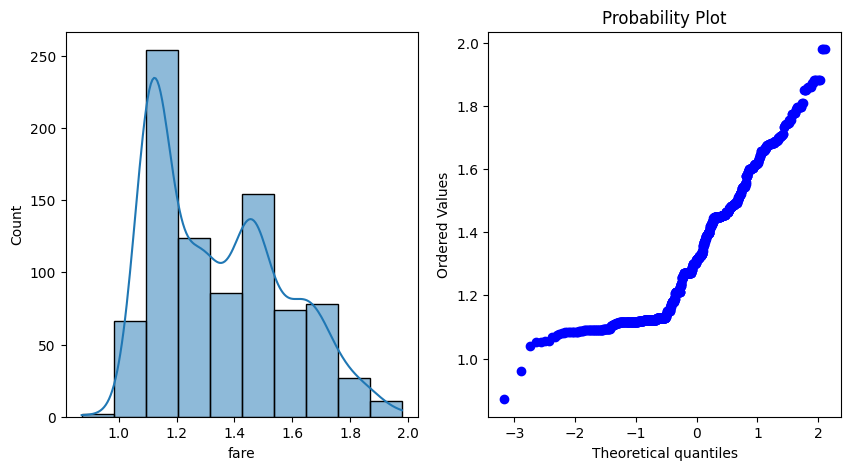

In [14]:
fig, axis1 = plt.subplots(nrows=1,ncols=2, figsize=(10, 5))

sns.histplot(df["fare"],kde=True,bins=10, label='data1', ax=axis1[0])
stats.probplot(x=df["fare"],dist="norm",plot=plt)

plt.show()

<h1>Resiprocal Transformer</h1>

In [17]:
def resiprocal_transformer(x):
    reciprocals = 1 / x
    reciprocals[reciprocals == float('inf')] = 0 # Handle potential division by zero
    return reciprocals

In [18]:
resiprocalTransformer = FunctionTransformer(func=resiprocal_transformer)
df["resiprocal_fare"] = resiprocalTransformer.fit_transform(df["fare"])

In [19]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,resiprocal_fare
531,0,3,male,NaN,0,0,1.091295,C,Third,man,True,NaN,Cherbourg,no,True,0.916342
198,1,3,female,NaN,0,0,1.114385,Q,Third,woman,False,NaN,Queenstown,yes,True,0.897356
654,0,3,female,18.0,0,0,1.067996,Q,Third,woman,False,NaN,Queenstown,no,True,0.936333
244,0,3,male,30.0,0,0,1.091100,C,Third,man,True,NaN,Cherbourg,no,True,0.916506
274,1,3,female,NaN,0,0,1.114385,Q,Third,woman,False,NaN,Queenstown,yes,True,0.897356


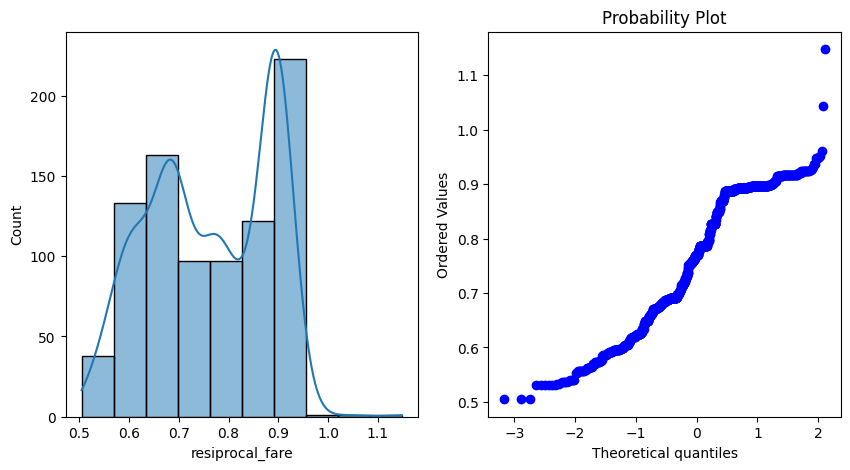

In [20]:
fig, axis2 = plt.subplots(nrows=1,ncols=2, figsize=(10, 5))

sns.histplot(df["resiprocal_fare"],kde=True,bins=10, label='data1', ax=axis2[0])
stats.probplot(x=df["resiprocal_fare"],dist="norm",plot=plt)

plt.show()

<Axes: xlabel='fare'>

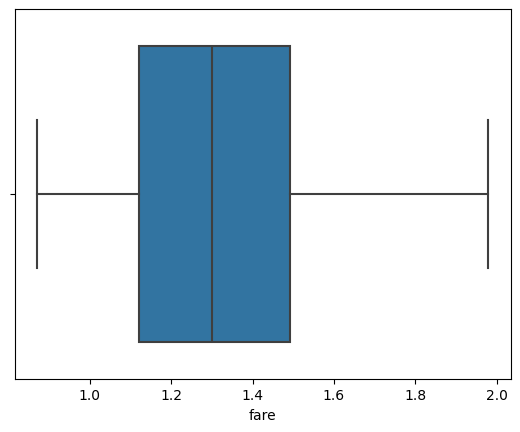

In [24]:
sns.boxplot(x=df["fare"])